In [3]:
def to_image(pixel):
    return [[pixel]]

def to_pixel(image):
    return image[0][0]

def convert_rgb2lab(rgb_pixel):
    return to_pixel(color.rgb2lab(to_image(rgb_pixel)))

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.colors
import matplotlib.colors as c
import pandas as pd
import matplotlib.colors as mcolors
from skimage import color
from skimage import io

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
CSS_ELLY = ['black','gray','white','lightcoral','brown','red','chocolate','tan','orange','goldenrod','darkkhaki','yellow','darkseagreen','green','lime','darkcyan','cyan','deepskyblue','darkslategray','steelblue','navy','blue','darkviolet','violet','purple','deeppink','magenta','pink']
CSS_ELENA = {}
for x in CSS_ELLY:
    CSS_ELENA[x] = mcolors.CSS4_COLORS[x]

In [8]:

CSS_RGB_COLORS = [mcolors.hex2color(c) for c in CSS_ELENA]

CSS_LAB_COLORS = [convert_rgb2lab(c) for c in CSS_RGB_COLORS]

BASE_RGB_COLORS = [[float(v) for v in c] for c in mcolors.BASE_COLORS.values()]

BASE_LAB_COLORS = [convert_rgb2lab(c) for c in BASE_RGB_COLORS]

In [9]:
def get_centroids_base_colors(image, number_of_colors=10, show_chart=True):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]

    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    #rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    lab_colors = [convert_rgb2lab(p) for p in ordered_colors]
    
    centroids_df = pd.DataFrame()
    
    for i in range(number_of_colors):
        c_dict = {}
        print(ordered_colors[i])
        rgb_c = ordered_colors[i]
        c_dict['centroid'] = rgb_c
        
        nearest_base_color = 0
        lab_c = lab_colors[i]
        
        min_distance = deltaE_cie76(lab_c, CSS_LAB_COLORS[0])
        nearest_base_color_index = 0
        
        i = 1
        for c in CSS_LAB_COLORS[1:]:
            tmp_distance = deltaE_cie76(lab_c, c)
            if (tmp_distance < min_distance):
                min_distance = tmp_distance
                nearest_base_color = i
            i += 1
                
        c_dict['nearest_base_color'] = CSS_RGB_COLORS[nearest_base_color]
        
        centroids_df = centroids_df.append(c_dict, ignore_index=True)
        nearest_base_colors_rgbs = centroids_df['nearest_base_color']
        nearest_base_colors_hex = [mcolors.rgb2hex(c) for c in nearest_base_colors_rgbs] 
    
    if (show_chart):
        plt.figure(figsize = (16, 6))
        fig_dims = (1, 2)
        ax_1 = plt.subplot2grid(fig_dims, (0, 0))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        ax_1 = plt.subplot2grid(fig_dims, (0, 1))
        plt.pie(counts.values(), labels = nearest_base_colors_hex, colors = nearest_base_colors_rgbs)
            
    return centroids_df

In [10]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\Pinocchio\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0005.png_resized.png
[0.03565954 0.01687714 0.01152472]
[0.06613096 0.05670799 0.06946574]
[0.13122665 0.1074355  0.12422935]
[0.20229817 0.17834202 0.17601534]
[0.12037545 0.05238047 0.03295986]
[0.29747452 0.14048861 0.0546011 ]
[0.21068114 0.29844794 0.31607748]
[0.44699526 0.28142119 0.14738866]
[0.56597057 0.41270935 0.26493806]
[0.63153476 0.69661838 0.58128731]
output_0007.png_resized.png
[0.62542694 0.63049044 0.50076226]
[0.56407228 0.5267293  0.38164176]
[0.43964866 0.40664993 0.30354269]
[0.34999848 0.24219361 0.15007642]
[0.14943722 0.06752776 0.04173605]
[0.25876062 0.14695376 0.09806679]
[0.09899473 0.15589661 0.23650397]
[0.04566252 0.06857944 0.1389497 ]
[0.2783045  0.37607534 0.53712153]
[0.5089616  0.36210858 0.19572229]
output_0010.png_resized.png
[0.10307337 0.06578383 0.07074655]
[0.02681016 0.02652974 0.03551376]
[0.16325297 0.11324909 0.10442741]
[0.23429388 0.15761305 0.11051481]
[0.22492705 0.21386156 0.21705876]
[0.32622117 0.22378375 0.1412317 ]
[0.398

output_0075.png_resized.png
[0.42159139 0.34533914 0.25595499]
[0.35657438 0.26900098 0.19269796]
[0.29210783 0.20676041 0.16058765]
[0.23193852 0.15777625 0.14223913]
[0.4957573  0.49487756 0.42896641]
[0.11866083 0.07949486 0.11194429]
[0.53530548 0.65949741 0.70899819]
[0.64167921 0.66308947 0.5423565 ]
[0.57928685 0.39064445 0.15038725]
[0.84184011 0.73927499 0.29600595]
output_0077.png_resized.png
[0.57144227 0.40207393 0.28408467]
[0.42018779 0.30290703 0.22192966]
[0.30480667 0.16537082 0.13266944]
[0.50968298 0.1769886  0.13654183]
[0.30364272 0.4117256  0.43034823]
[0.70005503 0.51059339 0.27553268]
[0.53242239 0.60671193 0.33043216]
[0.66865474 0.62632414 0.50155345]
[0.20633835 0.28712515 0.09169724]
[0.0831908  0.09408406 0.12462804]
output_0080.png_resized.png
[0.30282869 0.21050907 0.14478732]
[0.23381693 0.15226648 0.11557282]
[0.16447235 0.10726838 0.08683564]
[0.07247116 0.04963808 0.03322123]
[0.38192566 0.25230359 0.15642213]
[0.45468855 0.36124444 0.2992755 ]
[0.677

[0.02054393 0.01330479 0.01516125]
[0.07236135 0.04528899 0.03686006]
[0.13104837 0.08604825 0.05829948]
[0.20254559 0.13192154 0.07403694]
[0.2916284  0.21592865 0.12688347]
[0.16817415 0.18311362 0.17621113]
[0.38417637 0.31781326 0.19838718]
[0.51351883 0.4244368  0.23330434]
[0.64206628 0.53001861 0.27985756]
[0.79168135 0.65036363 0.29958789]
output_0148.png_resized.png
[0.33025608 0.36387766 0.39506327]
[0.42728951 0.5056396  0.52671841]
[0.3109891  0.17606124 0.14031534]
[0.209655   0.12055098 0.11125294]
[0.04067978 0.17648016 0.31480505]
[0.10507765 0.29241742 0.43932455]
[0.04501816 0.05435067 0.05861072]
[0.50978243 0.60422583 0.62612692]
[0.69143203 0.76892076 0.8582707 ]
[0.25674774 0.4806747  0.56450917]
output_0151.png_resized.png
[0.29785189 0.34605329 0.43607239]
[0.21703661 0.25710924 0.35355041]
[0.05682859 0.09516725 0.18408342]
[0.03693308 0.0482532  0.08145285]
[0.14299333 0.16668966 0.25405195]
[0.47449119 0.507976   0.60576337]
[0.56509485 0.59396557 0.69965732]

C:\Users\Attilio\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


IndexError: list index out of range

In [11]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]

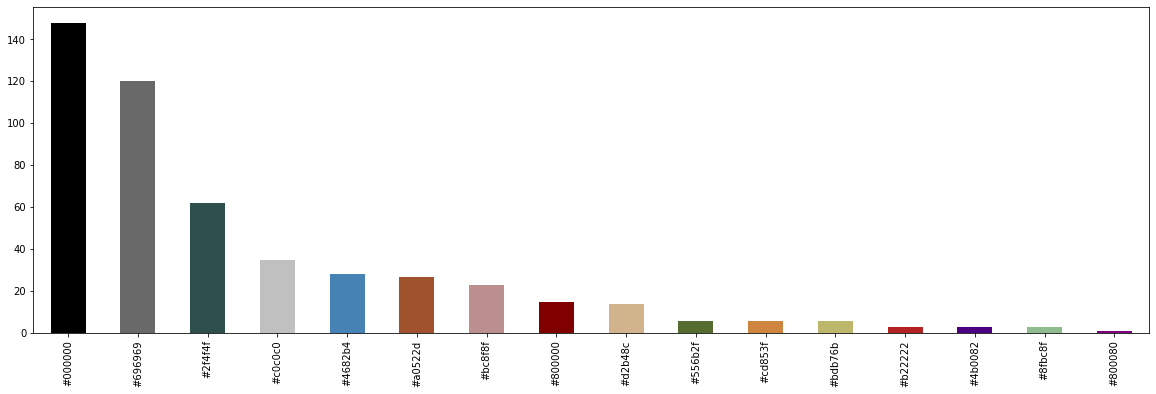

In [12]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()

In [10]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\2010-Up-resized1\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0004.png_resized - Copia.png
[0.00494856 0.00493773 0.00498288]
[0.0543318  0.0542483  0.05430089]
[0.13576066 0.13572742 0.13576223]
[0.24128382 0.24123793 0.24132494]
[0.34550829 0.34548437 0.34551068]
[0.43635914 0.43635251 0.4363567 ]
[0.53996236 0.53995353 0.53995979]
[0.6446394 0.6446394 0.6446394]
[0.74109086 0.74109086 0.74109086]
[0.82352272 0.82348544 0.82332696]
output_0006.png_resized - Copia.png
[0.05650018 0.05371453 0.06943853]
[0.11045927 0.10696535 0.13028357]
[0.15031411 0.20072744 0.27882044]
[0.31357268 0.35809363 0.42992611]
[0.44119014 0.4719761  0.56197346]
[0.54004883 0.61954507 0.71032067]
[0.77624332 0.86855169 0.90246881]
[0.19545987 0.16168891 0.16103656]
[0.01139518 0.0111854  0.0150531 ]
[0.28724423 0.27951495 0.28788185]
output_0008.png_resized - Copia.png
[0.15758361 0.10967746 0.07979122]
[0.08551497 0.05479048 0.03432202]
[0.19091865 0.16577971 0.19126687]
[0.33529881 0.21264222 0.08725603]
[0.51133873 0.38433895 0.25134027]
[0.46473588 0.298766

[0.47119742 0.34586046 0.24322433]
[0.67174118 0.47484307 0.31597339]
output_0072.png_resized - Copia.png
[0.73931399 0.83440751 0.91998238]
[0.73285763 0.75285526 0.7840656 ]
[0.65133156 0.63711391 0.65886292]
[0.48121824 0.49216945 0.52491644]
[0.81068347 0.83961838 0.8582931 ]
[0.63337294 0.48356323 0.43369096]
[0.42008844 0.3759631  0.37402726]
[0.34492407 0.28474317 0.25999824]
[0.21232024 0.19334398 0.18769927]
[0.10986781 0.11497757 0.12840425]
output_0073.png_resized - Copia.png
[0.55720697 0.59654288 0.65890586]
[0.61311609 0.75451519 0.9126003 ]
[0.45832063 0.49225441 0.52271549]
[0.36623762 0.31301791 0.27474213]
[0.48903276 0.40463195 0.34113213]
[0.74434288 0.82245327 0.91106814]
[0.71371428 0.70087144 0.72970694]
[0.67403008 0.5145267  0.37194044]
[0.24490044 0.20012775 0.17536417]
[0.11109397 0.10247656 0.1178247 ]
output_0075.png_resized - Copia.png
[0.67300808 0.79431507 0.89950732]
[0.60143604 0.59387945 0.63689748]
[0.19589169 0.50027667 0.58261154]
[0.11382491 0.094

[0.13908326 0.09902195 0.08163623]
[0.19619612 0.14453445 0.12160317]
[0.3164607  0.26714346 0.24325336]
[0.26686618 0.19937327 0.1725858 ]
[0.47267022 0.40927117 0.35799348]
[0.07491126 0.05268926 0.04481024]
[0.40448142 0.34238552 0.29540925]
[0.55669451 0.49283446 0.45546823]
[0.6996104  0.6107118  0.58555717]
[0.83195941 0.72542452 0.6991635 ]
output_0128.png_resized.png
[0.85538948 0.80930639 0.75310954]
[0.83879169 0.76655131 0.73466078]
[0.81560358 0.73116626 0.6870903 ]
[0.78303906 0.65785274 0.59894341]
[0.77451914 0.59002356 0.47648627]
[0.73414951 0.49635731 0.3873162 ]
[0.67176502 0.41105365 0.32517578]
[0.5858804  0.3471159  0.28240658]
[0.51279075 0.29724792 0.2472625 ]
[0.40672177 0.23192466 0.20159639]
output_0130.png_resized.png
[0.8105644  0.65315616 0.57899123]
[0.72960348 0.51845438 0.42908145]
[0.53278224 0.34120885 0.28256459]
[0.4317322  0.26567641 0.21488924]
[0.65306526 0.40966886 0.32939615]
[0.33157172 0.20103884 0.15840349]
[0.23564676 0.14377323 0.10975326]

In [11]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]

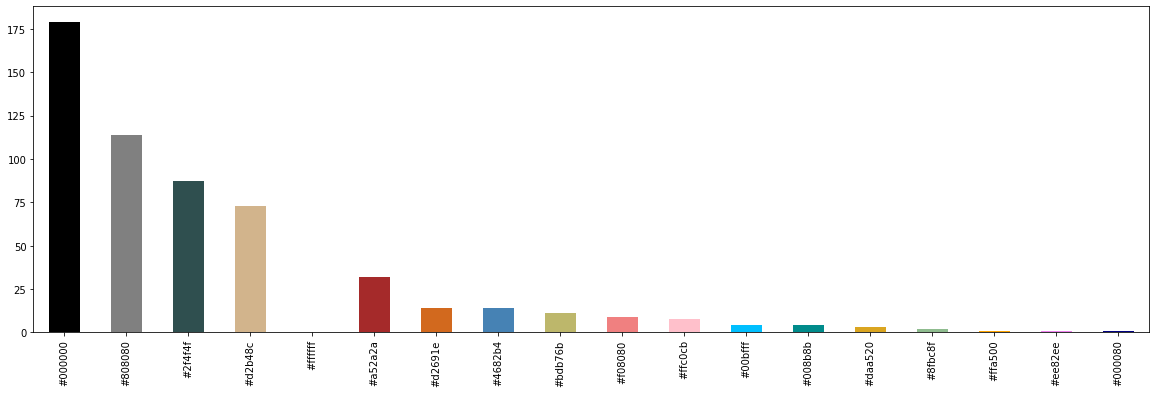

In [12]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()